<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
dfa = pd.read_csv('/Users/Naekid/Desktop/DSI-SF-5-fork/DSI-SF-5/datasets/sf_assessor_value/assessor_value_cleaned.csv')

In [3]:
dfa.head(5)

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,property_class,neighborhood,tax_rate,volume,sqft,stories,year_recorded,year_built,zone,value
0,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1419,0,2007,1907,RH3,1002840.0
1,2,2,0.0,0.0,0.0,1.00000,7,Z,08E,1000.0,1,1773,0,2007,1907,RH3,1433430.0
2,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1242,0,2007,1995,C2,485599.0
3,1,0,0.0,0.0,0.0,0.33333,6,D,08E,1000.0,1,1820,1,2007,1927,RH3,120826.0
4,1,0,0.0,0.0,0.0,1.00000,4,D,08E,1000.0,1,1020,1,2007,1926,RH3,988380.0


In [4]:
dfa.shape

(754147, 17)

In [5]:
dfa.property_class.value_counts()

D      627017
Z      120853
LZ       3402
ZBM      1479
TH        929
DBM       467
Name: property_class, dtype: int64

In [6]:
dfa.front_ft.value_counts()

0.00     753807
25.00       232
50.00        32
27.00        14
28.00         8
26.00         8
15.99         8
43.00         8
31.73         8
40.00         8
34.00         8
33.33         5
25.13         1
Name: front_ft, dtype: int64

In [7]:
dfa['volume'].value_counts().sort_index(ascending=False)

44    25375
43    14375
42    29373
41    20623
40    20686
39    11146
38    30449
37    22109
36    23426
35    26861
34    15258
33    14250
32    20278
31     5971
30     9152
29     8537
28     2982
27     9272
26     3483
25     9498
24     6288
23     6163
22    27844
21    24745
20    20773
19    25166
18    26931
17    31453
16    32122
15    31714
14    29999
13    20061
12    25689
11    18179
10    10140
9      8137
8      9379
7      9623
6      7832
5     22016
4     11133
3      6336
2      9184
1     10136
Name: volume, dtype: int64

In [8]:
dfa.describe()

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,tax_rate,volume,sqft,stories,year_recorded,year_built,value
count,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,754147.000000,7.541470e+05
mean,1.454369,0.754092,7.865771,49.159869,0.012888,0.897754,5.582982,1000.389953,23.767649,1399.682332,1.149569,2010.479978,1941.020598,4.055065e+05
std,0.632256,1.241474,20.137087,144.199184,0.630595,0.214527,1.405920,2.345064,12.458320,461.872881,0.558494,2.299106,23.594388,3.678854e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1000.000000,1.000000,495.000000,0.000000,2007.000000,1901.000000,3.002400e+04
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1000.000000,14.000000,1075.000000,1.000000,2008.000000,1924.000000,1.287180e+05
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1000.000000,21.000000,1320.000000,1.000000,2010.000000,1939.000000,3.217570e+05
75%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1000.000000,36.000000,1656.000000,1.000000,2012.000000,1953.000000,5.660385e+05
max,3.000000,4.000000,93.300000,799.000000,50.000000,1.000000,9.000000,1019.000000,44.000000,3050.000000,4.000000,2014.000000,2013.000000,8.755610e+06


In [9]:
dfa.dtypes

baths               int64
beds                int64
lot_depth         float64
basement_area     float64
front_ft          float64
owner_pct         float64
rooms               int64
property_class     object
neighborhood       object
tax_rate          float64
volume              int64
sqft                int64
stories             int64
year_recorded       int64
year_built          int64
zone               object
value             float64
dtype: object

My prediction is that Value is correlated most strongly with baths, beds, rooms, sqft.
<br>Property class and neighborhood might be strong predictors as well but they are categorical and must be converted into numerical values. 
<br>Then I would think year_built, stories, volume would be correlated with value. 
<br>Lastly, I would check lot_depth, basement_area, front_ft. 



In [ ]:
sns.pairplot(data=dfa[['baths','beds','rooms','sqft','value']])

Looks like baths, rooms, and sqft are highly correlated with value, but beds is not. 

In [ ]:
sns.pairplot(data=dfa[['year_built','stories','volume','value']])

OK im sticking with baths, rooms, and sqft. 

In [ ]:
sns.pairplot(data=dfa[['lot_depth', 'basement_area', 'front_ft','value']])

In [ ]:
sns.stripplot(x='rooms', y='value', data=dfa)

In [ ]:
sns.stripplot(x='sqft', y='value', data=dfa)

In [ ]:
sns.stripplot(x='baths', y='value', data=dfa)

**Answer** Hypothesis: Baths, Rooms, and Sqft are correlated with value, and so we can build a linear regression model to successfully (>95% R^2) predict the value of a home from just these columns. And if not, 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [10]:
predictor_cols = ['baths','rooms','sqft']

In [11]:
target_col = ['value']

In [12]:
from sklearn.model_selection import train_test_split
X = dfa[predictor_cols].values
y = np.ravel(dfa[target_col].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [13]:
# Plain old regular regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
lr.score(X=X_test, y=y_test)

0.11580065899914348

That R value isn't great. 

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=lr, X=X, y=y, cv=3)

array([ 0.09371506,  0.11842097,  0.11561162])

**ANSWER**:
<br>
Those are also bad R^2 values, and similar to the error values we got through just a single train_test_split.
<br><br>Not sure what there is to visualize here. 
<br><br>What these results mean is that my simple linear regression model based on 3 predictors is not a good model. We need to either increase the complexity of my model, or include more factors. 



<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

1. R^2 is a measure of the proportion of variability in the response due to the model to the inherent variability in the response. If the measure is 1, that means the variation in the predicted response is explained entirely due to the variability in the true response. NEgative R^2 means that the model is worse at predicting values than a horizontal line is. 

2. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
dff = pd.read_csv('/Users/Naekid/Desktop/DSI-SF-5-fork/DSI-SF-5/datasets/san_francisco/san_francisco/san_francisco/fire_data/fire_incidents.csv', dtype=str)

In [4]:
dfc = pd.read_csv('/Users/Naekid/Desktop/DSI-SF-5-fork/DSI-SF-5/datasets/san_francisco/san_francisco/san_francisco/sf_crime/sfpd_incidents_from2003.csv')

In [5]:
dff.shape

(406736, 63)

In [19]:
dff.columns.tolist()

['Incident Number',
 'Exposure Number',
 'Address',
 'Incident Date',
 'Call Number',
 'Alarm DtTm',
 'Arrival DtTm',
 'Close DtTm',
 'City',
 'Zipcode',
 'Battalion',
 'Station Area',
 'Box',
 'Suppression Units',
 'Suppression Personnel',
 'EMS Units',
 'EMS Personnel',
 'Other Units',
 'Other Personnel',
 'First Unit On Scene',
 'Estimated Property Loss',
 'Estimated Contents Loss',
 'Fire Fatalities',
 'Fire Injuries',
 'Civilian Fatalities',
 'Civilian Injuries',
 'Number of Alarms',
 'Primary Situation',
 'Mutual Aid',
 'Action Taken Primary',
 'Action Taken Secondary',
 'Action Taken Other',
 'Detector Alerted Occupants',
 'Property Use',
 'Area of Fire Origin',
 'Ignition Cause',
 'Ignition Factor Primary',
 'Ignition Factor Secondary',
 'Heat Source',
 'Item First Ignited',
 'Human Factors Associated with Ignition',
 'Structure Type',
 'Structure Status',
 'Floor of Fire Origin',
 'Fire Spread',
 'No Flame Spead',
 'Number of floors with minimum damage',
 'Number of floors wit

In [20]:
dff.head(2)

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,Battalion,Station Area,Box,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,First Unit On Scene,Estimated Property Loss,Estimated Contents Loss,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Primary Situation,Mutual Aid,Action Taken Primary,Action Taken Secondary,Action Taken Other,Detector Alerted Occupants,Property Use,Area of Fire Origin,Ignition Cause,Ignition Factor Primary,Ignition Factor Secondary,Heat Source,Item First Ignited,Human Factors Associated with Ignition,Structure Type,Structure Status,Floor of Fire Origin,Fire Spread,No Flame Spead,Number of floors with minimum damage,Number of floors with significant damage,Number of floors with heavy damage,Number of floors with extreme damage,Detectors Present,Detector Type,Detector Operation,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,09030109,0,310 Colon Av.,04/12/2009,091020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,B09,15,NaN,1,5,0,0,0,0,T15,NaN,NaN,0,0,0,0,NaN,551 - assist pd or other govern. agency,none,52 - forcible entry,-,-,-,"000 - property use, other",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,B09,39,8571,3,11,0,0,0,0,E39,NaN,NaN,0,0,0,0,NaN,745 - alarm system sounded/no fire-accidental,none,86 - investigate,-,-,-,429 - multifamily dwellings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The question is asking about predicting the count of fire incidents. 
<br><br>
Since this data set does not, in it's original form, give us count values, we need to get those. I'm going to get them by grouping by day, and then counting the fire instances in each day. THe Incident Number column has no missing values so we can count those values to see how many fire incidents we had each day. 
<br><br>
Then we can have the sum() of the suppression units and suppression personnel, and the Fire Fatalities, Fire Injuries, Civilian Injuries. But the problem is that the fire causes the emergency personnel count, not the other way around. So it’s not very useful to predict number of fires from the number of emergy personnel on the scene. 

In [6]:
gf = dff.groupby(by=['Incident Date']).count()
# gf.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last')
gf.reset_index(inplace=True)

In [7]:
gf.head()

,Incident Date,Incident Number,Exposure Number,Address,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,Battalion,Station Area,Box,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,First Unit On Scene,Estimated Property Loss,Estimated Contents Loss,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Primary Situation,Mutual Aid,Action Taken Primary,Action Taken Secondary,Action Taken Other,Detector Alerted Occupants,Property Use,Area of Fire Origin,Ignition Cause,Ignition Factor Primary,Ignition Factor Secondary,Heat Source,Item First Ignited,Human Factors Associated with Ignition,Structure Type,Structure Status,Floor of Fire Origin,Fire Spread,No Flame Spead,Number of floors with minimum damage,Number of floors with significant damage,Number of floors with heavy damage,Number of floors with extreme damage,Detectors Present,Detector Type,Detector Operation,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,01/01/2003,143,143,143,143,143,143,143,143,118,143,143,12,143,143,143,143,143,143,118,143,143,143,143,143,143,0,143,143,143,143,143,143,143,21,21,21,21,21,21,21,14,14,2,14,2,2,2,2,2,14,14,14,14,14,14,14,14,14,2,118,118,118
1,01/01/2004,149,149,149,149,149,149,149,149,116,149,149,1,149,149,149,149,149,149,148,149,149,149,149,149,149,0,149,149,149,149,149,149,149,8,8,8,8,8,8,8,5,5,4,5,4,4,4,4,4,5,5,5,5,5,5,5,5,5,4,116,116,116
2,01/01/2005,95,95,95,95,95,95,95,95,79,95,95,0,95,95,95,95,95,95,95,95,95,95,95,95,95,0,95,95,95,95,95,95,95,4,4,4,4,4,4,4,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,79,79,79
3,01/01/2006,96,96,96,96,96,96,96,96,74,96,96,0,96,96,96,96,96,96,96,96,96,96,96,96,96,0,96,96,96,96,96,96,96,6,6,6,6,6,6,6,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,74,74,74
4,01/01/2007,131,131,131,131,131,131,131,131,98,131,131,0,131,131,131,131,131,131,127,8,12,131,131,131,131,0,131,131,131,131,131,131,131,12,12,12,12,12,12,12,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,98,98,103


In [8]:
import datetime
gf['Incident Date'] = pd.to_datetime(gf['Incident Date'], format='%m/%d/%Y')

In [9]:
gf.sort_values(by='Incident Date', ascending=True, inplace=True)

In [10]:
gf.head(3)

,Incident Date,Incident Number,Exposure Number,Address,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,Battalion,Station Area,Box,Suppression Units,Suppression Personnel,EMS Units,EMS Personnel,Other Units,Other Personnel,First Unit On Scene,Estimated Property Loss,Estimated Contents Loss,Fire Fatalities,Fire Injuries,Civilian Fatalities,Civilian Injuries,Number of Alarms,Primary Situation,Mutual Aid,Action Taken Primary,Action Taken Secondary,Action Taken Other,Detector Alerted Occupants,Property Use,Area of Fire Origin,Ignition Cause,Ignition Factor Primary,Ignition Factor Secondary,Heat Source,Item First Ignited,Human Factors Associated with Ignition,Structure Type,Structure Status,Floor of Fire Origin,Fire Spread,No Flame Spead,Number of floors with minimum damage,Number of floors with significant damage,Number of floors with heavy damage,Number of floors with extreme damage,Detectors Present,Detector Type,Detector Operation,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,2003-01-01,143,143,143,143,143,143,143,143,118,143,143,12,143,143,143,143,143,143,118,143,143,143,143,143,143,0,143,143,143,143,143,143,143,21,21,21,21,21,21,21,14,14,2,14,2,2,2,2,2,14,14,14,14,14,14,14,14,14,2,118,118,118
14,2003-01-02,84,84,84,84,84,84,84,84,65,84,84,0,84,84,84,84,84,84,74,84,84,84,84,84,84,0,84,84,84,84,84,84,84,3,3,3,3,3,3,3,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,65,65,65
28,2003-01-03,120,120,120,120,120,120,120,120,90,120,120,1,120,120,120,120,120,120,104,120,120,120,120,120,120,0,120,120,120,120,120,120,120,5,5,5,5,5,5,5,3,3,2,3,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,90,90,90


In [11]:
dff.isnull().sum().sort_values(ascending=False)

Number of Alarms                                406736
Number of floors with significant damage        400152
Number of floors with minimum damage            400150
Number of floors with heavy damage              400150
Number of floors with extreme damage            400149
Number of Sprinkler Heads Operating             400096
Floor of Fire Origin                            399412
Fire Spread                                     397150
Automatic Extinguishing Sytem Failure Reason    397144
Detector Failure Reason                         397132
Automatic Extinguishing Sytem Type              396960
Automatic Extinguishing Sytem Perfomance        396960
Detector Effectiveness                          396874
Detector Operation                              396745
Detector Type                                   396745
Structure Status                                396399
Automatic Extinguishing System Present          396399
Detectors Present                               396398
Structure 

In [12]:
dff['Structure Type'].unique()

array([nan, '1 -enclosed building', '3 -open structure', '-',
       '2 -fixed portable or mobile structure', '1 enclosed building',
       '0 -structure type, other', '5 -tent', '6 -open platform',
       '7 -underground structure work areas', '8 -connective structure',
       '0 structure type, other', '4 -air supported structure',
       '3 open structure', '6 open platform', '8 connective structure',
       '2 fixed portable or mobile structure',
       '7 underground structure work area', '4 air-supported structure'], dtype=object)

In [13]:
dff['Structure Status'].unique()

array([nan, '2 -in normal use', '-', '3 -idle, not routinely used',
       '5 -vacant and secured', '2 in normal use',
       '6 -vacant and unsecured', '0 -other', '1 -under construction',
       '4 -under major renovation', '1 under construction',
       '4 under major renovation', 'u -undetermined',
       '7 -being demolished', 'u undetermined', '5 vacant and secured',
       '0 building status, other', '6 vacant and unsecured',
       '3 idle, not routinely used', '7 being demolished'], dtype=object)

In [14]:
dff['Ignition Cause'].unique()

array([nan, '2 - unintentional', '0 - cause, other',
       '3 - failure of equipment or heat source', '-', '1 - intentional',
       'u - cause undetermined after investigation', '2 unintentional',
       '5 - cause under investigation',
       'u cause undetermined after investigation', '4 - act of nature',
       '3 failure of equipment or heat source', '1 intentional',
       '5 cause under investigation', '4 act of nature',
       '0 cause, other (only used for additional exposures)'], dtype=object)

In [15]:
dff['Detector Effectiveness'].value_counts()

-                                                            7374
1 -alerted occupants, occupants responded                    1875
1 detector alerted occupants, occupants responded             232
3 -there were no occupants                                    192
2 -alerted occupants-occ. failed to resond                     60
u -undetermined                                                55
3 there were no occupants                                      29
4 -failed to alert occupants                                   21
u undetermined                                                 12
2 detector alerted occupants, occupants failed to respond      11
4 detector failed to alert occupants                            1
Name: Detector Effectiveness, dtype: int64

In [16]:
dff['Neighborhood  District'].unique()

array([nan, 'South of Market', 'Nob Hill', 'Marina', 'Visitacion Valley',
       'Sunset/Parkside', 'Potrero Hill', 'Presidio Heights',
       'Financial District/South Beach', 'Chinatown', 'West of Twin Peaks',
       'Mission', 'Russian Hill', 'Pacific Heights', 'Excelsior',
       'Tenderloin', 'Bayview Hunters Point', 'Treasure Island',
       'Inner Sunset', 'Portola', 'Lone Mountain/USF',
       'Castro/Upper Market', 'Golden Gate Park', 'Inner Richmond',
       'Hayes Valley', 'North Beach', 'Outer Mission', 'Haight Ashbury',
       'Japantown', 'Lakeshore', 'Twin Peaks', 'Seacliff', 'Noe Valley',
       'Western Addition', 'Oceanview/Merced/Ingleside', 'Outer Richmond',
       'Bernal Heights', 'Mission Bay', 'Lincoln Park', 'Glen Park',
       'Presidio', 'McLaren Park'], dtype=object)

Now we have fire instances each day. 

**PIVOT** Okay so we're not sure how to use this data to make conclusions about the count of fire incidents each day. BUT we've come up with two new hypotheses that might be interesting to explore.
<br><br>
**HYP 1**: Predict the estimated property damage ($) in each day or week. Could use factors like number of emergy personnel on the scene, which is probably correlated with the scale of the fire which is probably correlated with the value of the building.
<br>
**HYP 2**: Predict number of emergency personnel needed each day/week, based on the estimated property value, Neighborhood  District. 

We're going to start with Hyp 2, because we think it would be useful for a fire department to get a call for a fire, and then be able to predict how many suppression personnel it needs to send to the fire. Therefore For predictors we're only going to include columns that have data that that corresponds to data that the fire department would know of before the fire occurred. So we can't, for instnace, use Fire Fatalities, because when the department gets the call, the department doesnt know how many fatalities have occured. 

<BR>
Going to start with the following predictors, and get more complicated if we have time.
<br>
**Predictors** = Structure Status, Structure Type, Detectors Present, Automatic Extinguishing System Present, Neighborhood District

**Target** = Suppression Personnel. 

In [17]:
dff = pd.read_csv('/Users/Naekid/Desktop/DSI-SF-5-fork/DSI-SF-5/datasets/san_francisco/san_francisco/san_francisco/fire_data/fire_incidents.csv', dtype=str)

In [18]:
cols = ['Incident Number','Incident Date','Structure Status', 'Structure Type', 'Detectors Present', 'Automatic Extinguishing System Present', 'Neighborhood  District', 'Suppression Personnel']
dff = dff[cols]


In [19]:
dff.head(3)

,Incident Number,Incident Date,Structure Status,Structure Type,Detectors Present,Automatic Extinguishing System Present,Neighborhood District,Suppression Personnel
0,09030109,04/12/2009,NaN,NaN,NaN,NaN,NaN,5
1,13067402,07/18/2013,NaN,NaN,NaN,NaN,NaN,11
2,12044490,05/13/2012,NaN,NaN,NaN,NaN,South of Market,10


### Data Cleaning

Let's just drop all the rows with nan.

In [20]:
dff.dropna(axis=0, inplace=True)

In [21]:
dff['Suppression Personnel'] = dff['Suppression Personnel'].astype(dtype=int)

In [22]:
dff.replace(to_replace='-', value='unknown', inplace=True)

In [23]:
structure_status_dict = {'0 -other':'0 other',
                        '2 -in normal use':'2 in normal use', 
                         '3 -idle, not routinely used':'3 idle, not routinely used',
                         '5 -vacant and secured':'5 vacant and secured',
                         '2 -in normal use':'2 in normal use',
                         '1 -under construction':'1 under construction',
                         '4 -under major renovation':'4 under major renovation',
                         'u -undetermined':'u undetermined',
                         '7 -being demolished':'7 being demolished',
                         'u -undetermined':'u undetermined',
                         '6 -vacant and unsecured':'6 vacant and unsecured',
                         '3 -idle':'3 idle'
                        }

dff.replace(structure_status_dict, inplace=True)


structure_type_dict = {
    '0 -structure type, other':'0 structure type, other',
    '1 -enclosed building':'1 enclosed building',
    '2 -fixed portable or mobile structure':'2 fixed portable or mobile structure',
    '3 -open structure':'3 open structure',
    '4 -air supported structure':'4 air supported structure',
    '5 -tent':'5 tent',
     '6 -open platform': '6 open platform',
    '7 -underground structure work areas':'7 underground structure work areas',
     '8 -connective structure': '8 connective structure',
    
}
dff.replace(structure_type_dict, inplace=True)

In [24]:
dff.replace({'1 -present': '1 present', 'u -undetermined': 'u undetermined', 'n -not present': 'n none present'}, inplace = True)
dff.replace({'1 -present': '1 present', '2 -partial system present': '2 partial system present', 'u -undetermined': 'u undetermined', 'n -none present': 'n none present'}, inplace = True)

In [25]:
dff.head(3)

,Incident Number,Incident Date,Structure Status,Structure Type,Detectors Present,Automatic Extinguishing System Present,Neighborhood District,Suppression Personnel
20,06060988,08/05/2006,2 in normal use,1 enclosed building,1 present,n none present,South of Market,33
38,05040114,05/30/2005,unknown,3 open structure,unknown,unknown,Bayview Hunters Point,4
80,06038931,05/20/2006,2 in normal use,1 enclosed building,u undetermined,n none present,North Beach,42


In [26]:
dff['Structure Status'].unique()

array(['2 in normal use', 'unknown', '3 idle, not routinely used',
       '5 vacant and secured', '1 under construction',
       '4 under major renovation', '0 other', '6 vacant and unsecured',
       'u undetermined', '7 being demolished', '0 building status, other'], dtype=object)

In [27]:
# Get dummies
status_dummies = pd.get_dummies(data=dff['Structure Status'], prefix='Structure Status', prefix_sep='_', drop_first=True)
type_dummies = pd.get_dummies(data=dff['Structure Type'], prefix='Structure Type', prefix_sep='_', drop_first=True)
detector_dummies = pd.get_dummies(data=dff['Structure Status'], prefix='Detectors Present', prefix_sep='_', drop_first=True)
automatic_dummies = pd.get_dummies(data=dff['Structure Status'], prefix='Extinguishing System Present', prefix_sep='_', drop_first=True)
neighborhood_dummies = pd.get_dummies(data=dff['Neighborhood  District'], prefix='Neighborhood', prefix_sep='_', drop_first=True)

dff_new = dff.ix[:, ['Incident Number','Incident Date','Suppression Personnel']]
dff_new = pd.concat(objs=[status_dummies, type_dummies, detector_dummies, automatic_dummies, neighborhood_dummies, dff_new], axis=1)



In [28]:
dff_new.head(3)

,Structure Status_0 other,Structure Status_1 under construction,Structure Status_2 in normal use,"Structure Status_3 idle, not routinely used",Structure Status_4 under major renovation,Structure Status_5 vacant and secured,Structure Status_6 vacant and unsecured,Structure Status_7 being demolished,Structure Status_u undetermined,Structure Status_unknown,Structure Type_1 enclosed building,Structure Type_2 fixed portable or mobile structure,Structure Type_3 open structure,Structure Type_4 air supported structure,Structure Type_5 tent,Structure Type_6 open platform,Structure Type_7 underground structure work areas,Structure Type_8 connective structure,Structure Type_unknown,Detectors Present_0 other,Detectors Present_1 under construction,Detectors Present_2 in normal use,"Detectors Present_3 idle, not routinely used",Detectors Present_4 under major renovation,Detectors Present_5 vacant and secured,Detectors Present_6 vacant and unsecured,Detectors Present_7 being demolished,Detectors Present_u undetermined,Detectors Present_unknown,Extinguishing System Present_0 other,Extinguishing System Present_1 under construction,Extinguishing System Present_2 in normal use,"Extinguishing System Present_3 idle, not routinely used",Extinguishing System Present_4 under major renovation,Extinguishing System Present_5 vacant and secured,Extinguishing System Present_6 vacant and unsecured,Extinguishing System Present_7 being demolished,Extinguishing System Present_u undetermined,Extinguishing System Present_unknown,Neighborhood_Bernal Heights,Neighborhood_Castro/Upper Market,Neighborhood_Chinatown,Neighborhood_Excelsior,Neighborhood_Financial District/South Beach,Neighborhood_Glen Park,Neighborhood_Golden Gate Park,Neighborhood_Haight Ashbury,Neighborhood_Hayes Valley,Neighborhood_Inner Richmond,Neighborhood_Inner Sunset,Neighborhood_Japantown,Neighborhood_Lakeshore,Neighborhood_Lincoln Park,Neighborhood_Lone Mountain/USF,Neighborhood_Marina,Neighborhood_McLaren Park,Neighborhood_Mission,Neighborhood_Mission Bay,Neighborhood_Nob Hill,Neighborhood_Noe Valley,Neighborhood_North Beach,Neighborhood_Oceanview/Merced/Ingleside,Neighborhood_Outer Mission,Neighborhood_Outer Richmond,Neighborhood_Pacific Heights,Neighborhood_Portola,Neighborhood_Potrero Hill,Neighborhood_Presidio,Neighborhood_Presidio Heights,Neighborhood_Russian Hill,Neighborhood_Seacliff,Neighborhood_South of Market,Neighborhood_Sunset/Parkside,Neighborhood_Tenderloin,Neighborhood_Treasure Island,Neighborhood_Twin Peaks,Neighborhood_Visitacion Valley,Neighborhood_West of Twin Peaks,Neighborhood_Western Addition,Incident Number,Incident Date,Suppression Personnel
20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,06060988,08/05/2006,33
38,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,05040114,05/30/2005,4
80,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,06038931,05/20/2006,42


In [44]:
dff_new['Suppression Personnel'] = dff_new['Suppression Personnel'].astype(int)
dff_new.columns

Index([u'Structure Status_0 other', u'Structure Status_1 under construction',
       u'Structure Status_2 in normal use',
       u'Structure Status_3 idle, not routinely used',
       u'Structure Status_4 under major renovation',
       u'Structure Status_5 vacant and secured',
       u'Structure Status_6 vacant and unsecured',
       u'Structure Status_7 being demolished',
       u'Structure Status_u undetermined', u'Structure Status_unknown',
       u'Structure Type_1 enclosed building',
       u'Structure Type_2 fixed portable or mobile structure',
       u'Structure Type_3 open structure',
       u'Structure Type_4 air supported structure', u'Structure Type_5 tent',
       u'Structure Type_6 open platform',
       u'Structure Type_7 underground structure work areas',
       u'Structure Type_8 connective structure', u'Structure Type_unknown',
       u'Detectors Present_0 other', u'Detectors Present_1 under construction',
       u'Detectors Present_2 in normal use',
       u'Detector

### EDA

In [30]:
dff.head()

,Incident Number,Incident Date,Structure Status,Structure Type,Detectors Present,Automatic Extinguishing System Present,Neighborhood District,Suppression Personnel
20,06060988,08/05/2006,2 in normal use,1 enclosed building,1 present,n none present,South of Market,33
38,05040114,05/30/2005,unknown,3 open structure,unknown,unknown,Bayview Hunters Point,4
80,06038931,05/20/2006,2 in normal use,1 enclosed building,u undetermined,n none present,North Beach,42
81,03016069,02/25/2003,2 in normal use,1 enclosed building,1 present,1 present,Tenderloin,22
97,05073724,10/02/2005,2 in normal use,3 open structure,unknown,unknown,Lone Mountain/USF,31


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]), <a list of 41 Text xticklabel objects>)

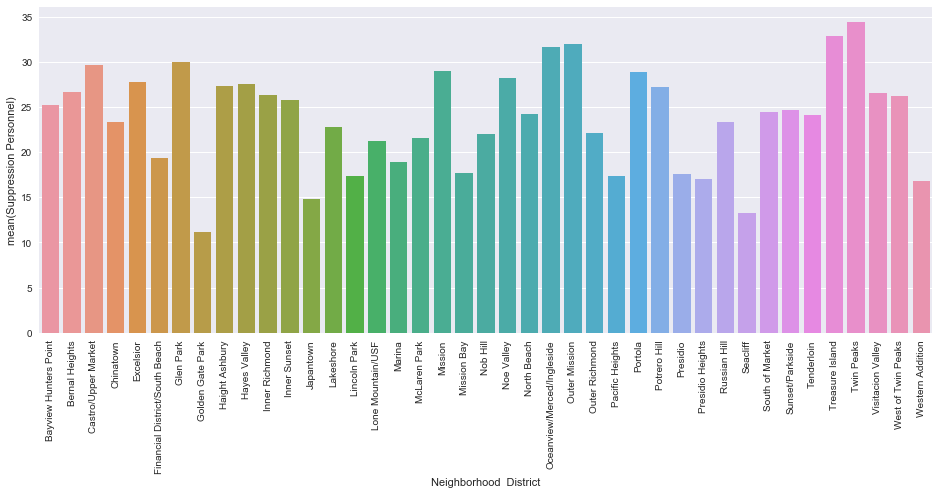

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# dff['Neighborhood  District'] = dff['Neighborhood  District'].astype(str)
# dff.groupby(by='Neighborhood District').count()
# dff['Neighborhood District'].value_counts()
# dff.columns
gn = dff.groupby(by='Neighborhood  District').mean()
# gn
fig = plt.figure(figsize=(16,6))
sns.barplot(x=gn.index, y=gn['Suppression Personnel'])
plt.xticks(rotation=90)

I honestly don't really know what to look for in EDA, it's something I need to read up on. I think the observation of note is just that the average number of personnel does vary depending on the area in the city, so I think we can conclude that this factor will be a significant predictor. 

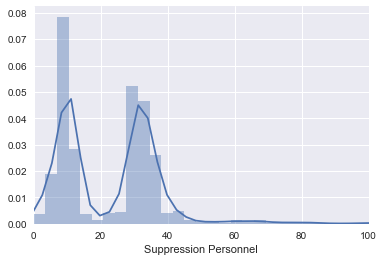

In [32]:
sns.distplot(a=dff.loc[:,'Suppression Personnel'], bins=100)
plt.xlim((0,100));

Interesting, we have a normal distributed with two peaks for the tenderloin. One seems to be at 10, and the other at 30. So on average, either 10 or 30 suppression personnel show up to the scene. 

### Modeling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = dff_new.iloc[:, :-3].values
y = np.ravel(dff_new.iloc[:, -1].values)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

# Create a linear regression Model 
lr = LinearRegression()

lr.fit(X_train, y_train)

# See how well it performs 
r_2 = lr.score(X_test, y_test)

print r_2


0.247423715548


that's a surprisingly good r_2. 

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

# X_shuff = shuffle(X)
lr_2 = LinearRegression()
cross_val_score(estimator=lr_2, X=X, y=y, cv=5, scoring='r2')
# 
# lr_2.coef_


array([  3.35164205e-01,   2.41189589e-01,   3.34634692e-01,
         3.26218851e-01,  -7.68658517e+21])

The crazy r2 value suggests that there's some outlier!! If we could find the outlier, we could improve our model. 

Maybe it's a large supression personnel value. So we'll filter out values over 100 for that column.

In [41]:
dff_new.shape

(8159, 82)

In [35]:
dff_new.head(3)

,Structure Status_0 other,Structure Status_1 under construction,Structure Status_2 in normal use,"Structure Status_3 idle, not routinely used",Structure Status_4 under major renovation,Structure Status_5 vacant and secured,Structure Status_6 vacant and unsecured,Structure Status_7 being demolished,Structure Status_u undetermined,Structure Status_unknown,Structure Type_1 enclosed building,Structure Type_2 fixed portable or mobile structure,Structure Type_3 open structure,Structure Type_4 air supported structure,Structure Type_5 tent,Structure Type_6 open platform,Structure Type_7 underground structure work areas,Structure Type_8 connective structure,Structure Type_unknown,Detectors Present_0 other,Detectors Present_1 under construction,Detectors Present_2 in normal use,"Detectors Present_3 idle, not routinely used",Detectors Present_4 under major renovation,Detectors Present_5 vacant and secured,Detectors Present_6 vacant and unsecured,Detectors Present_7 being demolished,Detectors Present_u undetermined,Detectors Present_unknown,Extinguishing System Present_0 other,Extinguishing System Present_1 under construction,Extinguishing System Present_2 in normal use,"Extinguishing System Present_3 idle, not routinely used",Extinguishing System Present_4 under major renovation,Extinguishing System Present_5 vacant and secured,Extinguishing System Present_6 vacant and unsecured,Extinguishing System Present_7 being demolished,Extinguishing System Present_u undetermined,Extinguishing System Present_unknown,Neighborhood_Bernal Heights,Neighborhood_Castro/Upper Market,Neighborhood_Chinatown,Neighborhood_Excelsior,Neighborhood_Financial District/South Beach,Neighborhood_Glen Park,Neighborhood_Golden Gate Park,Neighborhood_Haight Ashbury,Neighborhood_Hayes Valley,Neighborhood_Inner Richmond,Neighborhood_Inner Sunset,Neighborhood_Japantown,Neighborhood_Lakeshore,Neighborhood_Lincoln Park,Neighborhood_Lone Mountain/USF,Neighborhood_Marina,Neighborhood_McLaren Park,Neighborhood_Mission,Neighborhood_Mission Bay,Neighborhood_Nob Hill,Neighborhood_Noe Valley,Neighborhood_North Beach,Neighborhood_Oceanview/Merced/Ingleside,Neighborhood_Outer Mission,Neighborhood_Outer Richmond,Neighborhood_Pacific Heights,Neighborhood_Portola,Neighborhood_Potrero Hill,Neighborhood_Presidio,Neighborhood_Presidio Heights,Neighborhood_Russian Hill,Neighborhood_Seacliff,Neighborhood_South of Market,Neighborhood_Sunset/Parkside,Neighborhood_Tenderloin,Neighborhood_Treasure Island,Neighborhood_Twin Peaks,Neighborhood_Visitacion Valley,Neighborhood_West of Twin Peaks,Neighborhood_Western Addition,Incident Number,Incident Date,Suppression Personnel
20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,06060988,08/05/2006,33
38,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,05040114,05/30/2005,4
80,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,06038931,05/20/2006,42


In [36]:
# dff_new_filtered = 
dff_new = dff_new[dff_new['Suppression Personnel'] < 100]

In [37]:
dff.describe()

,Suppression Personnel
count,8213.000000
mean,23.451114
std,17.269227
min,0.000000
25%,10.000000
50%,28.000000
75%,33.000000
max,346.000000


In [38]:
X = dff_new.iloc[:, :-3].values
y = np.ravel(dff_new.iloc[:, -1].values)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

# Create a linear regression Model 
lr = LinearRegression()

lr.fit(X_train, y_train)

# See how well it performs 
r_2 = lr.score(X_test, y_test)

print r_2


0.30702700999


In [39]:
lr2 = LinearRegression()
scores = cross_val_score(estimator=lr2, X=X, y=y, cv=10, scoring='r2')
print scores
print 'median score', np.median(scores)

[ 0.41910433  0.34481412  0.30282984  0.36799224  0.39286412  0.36636771
  0.38731937  0.33343467  0.1392187   0.0429818 ]
median score 0.355590910686


I'm very curious as to what's causing that last r2 value to be very large, but I don't know what it is. 

But our median r2 value is 0.35, which is better than I thought we would get. 

Some coefficients are really significant and others are not. Maybe 


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

ls = Lasso()

# Set the parameters of the estimator model to scan over 
params = {
    'alpha':[1,2,3,4,5]
}
# create grid search CV 
gcv = GridSearchCV(estimator=ls, param_grid=params)
# fit model 
gcv.fit(X_train, y_train)
# gs.cv_results_
print gcv.best_score_, gcv.best_params_
# score 
gcv.score(X_test, y_test)

0.281280026762 {'alpha': 1}


0.28277057354832325

Lasso did not improve things. So our conclusion is that we might have a promising model, but some section of our data contains anomilies/outliers that are messing up our error rate. To continue this, I would perform some sort of clustering to see which data points are causing our error rate to sky-rocket. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [79]:
dfp = pd.read_csv('/Users/Naekid/Desktop/DSI-SF-5-fork/DSI-SF-5/datasets/san_francisco/san_francisco/san_francisco/parks/park_scores.csv')
dfi = pd.read_csv('/Users/Naekid/Desktop/DSI-SF-5-fork/DSI-SF-5/datasets/san_francisco/san_francisco/san_francisco/parks/park_info.csv')

In [80]:
dfp.head(5)

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859


In [81]:
dfp.PSA.value_counts()

PSA1    1355
PSA2     978
PSA3     770
PSA4     717
PSA5     710
PSA6     640
GGP      325
Name: PSA, dtype: int64

In [82]:
dfp['PSA'].replace(['PSA1','PSA2','PSA3','PSA4','PSA5','PSA6','GGP'], [1,2,3,4,5,6,7], inplace=True)

In [83]:
dfp.head()

,ParkID,PSA,Park,FQ,Score
0,86,4,Carl Larsen Park,FY05Q3,0.795
1,13,4,Junipero Serra Playground,FY05Q3,0.957
2,9,4,Rolph Nicol Playground,FY05Q3,0.864
3,117,2,Alamo Square,FY05Q4,0.857
4,60,6,Jose Coronado Playground,FY05Q4,0.859


In [84]:
dfi.head(1)

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
dfi.drop(labels=0, axis=0, inplace=True)

In [86]:
dfi.shape

(229, 12)

In [87]:
dfi.head(1)

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN


In [88]:
dfi.isnull().sum()

ParkName             0
ParkType             0
ParkServiceArea      0
PSAManager           0
email                0
Number               0
Zipcode              6
Acreage              0
SupDist              2
ParkID               0
Location 1          27
Lat                229
dtype: int64

In [89]:
dfi.drop(labels=['ParkName','PSAManager','email','Number','Zipcode','Location 1', 'Lat'], axis=1, inplace=True)

In [90]:
dfi.head(1)

,ParkType,ParkServiceArea,Acreage,SupDist,ParkID
1,Mini Park,PSA 1,0.66,1.0,156.0


In [91]:
dfi['ParkID'] = dfi['ParkID'].astype(int)

In [92]:
dfi.head(1)

,ParkType,ParkServiceArea,Acreage,SupDist,ParkID
1,Mini Park,PSA 1,0.66,1.0,156


In [93]:
dfi['ParkServiceArea'].value_counts()

PSA 1                       50
PSA 5                       39
PSA 2                       38
PSA 4                       34
PSA 6                       30
PSA 3                       27
Golden Gate Park             8
Outside SF                   2
Candlestick Park Stadium     1
Name: ParkServiceArea, dtype: int64

In [94]:
dfi = dfi[dfi['ParkServiceArea']!='Outside SF']
dfi = dfi[dfi['ParkServiceArea']!='Candlestick Park Stadium']

In [95]:
dfi['ParkServiceArea'].value_counts()

PSA 1               50
PSA 5               39
PSA 2               38
PSA 4               34
PSA 6               30
PSA 3               27
Golden Gate Park     8
Name: ParkServiceArea, dtype: int64

In [96]:
dfi['ParkServiceArea'].replace(['PSA 1','PSA 2','PSA 3','PSA 4','PSA 5','PSA 6','Golden Gate Park'], [1,2,3,4,5,6,7], inplace=True)

In [97]:
dfi['ParkServiceArea'].value_counts()

1    50
5    39
2    38
4    34
6    30
3    27
7     8
Name: ParkServiceArea, dtype: int64

In [98]:
dfi.rename(columns={'ParkServiceArea':'PSA'}, inplace=True)

In [99]:
dfp.drop(labels='FQ', axis=1, inplace=True)

In [100]:
dfi.head(1)

,ParkType,PSA,Acreage,SupDist,ParkID
1,Mini Park,1,0.66,1.0,156


In [101]:
dfp.head(1)

,ParkID,PSA,Park,Score
0,86,4,Carl Larsen Park,0.795


In [102]:
dfp.dropna(axis=0, inplace=True)

In [103]:
dfp.isnull().sum()

ParkID    0
PSA       0
Park      0
Score     0
dtype: int64

In [104]:
dfi.isnull().sum()

ParkType    0
PSA         0
Acreage     0
SupDist     0
ParkID      0
dtype: int64

In [105]:
dfi = dfi[['ParkID','ParkType','PSA','Acreage','SupDist']]

In [106]:
df = pd.merge(left=dfi, right=dfp, how='inner', on='ParkID')

In [107]:
df.drop(labels='PSA_y', axis=1, inplace=True)

In [108]:
grouped = df.groupby(by='ParkID').mean()

In [109]:
grouped.reset_index(inplace=True)

In [110]:
grouped.head()

,ParkID,PSA_x,Acreage,SupDist,Score
0,1,5,77.94,8.0,0.915485
1,2,5,0.83,8.0,1.000000
2,4,5,4.40,8.0,0.925576
3,6,5,1.20,8.0,0.954545
4,7,5,6.80,8.0,0.914758


In [115]:
X = grouped.iloc[:, 1:-1]

In [119]:
X = X.values

## EDA
---

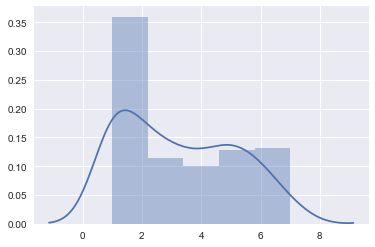

In [120]:
sns.distplot(a=X[:,0])

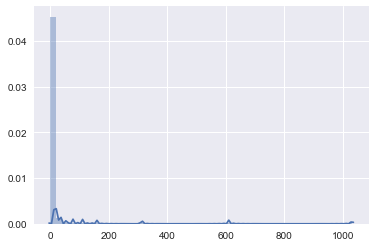

In [122]:
sns.distplot(a=X[:,1])

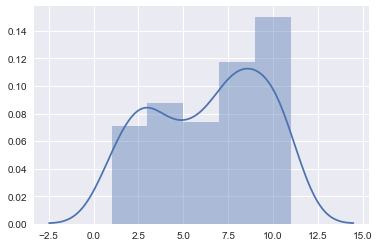

In [123]:
sns.distplot(a=X[:,2])

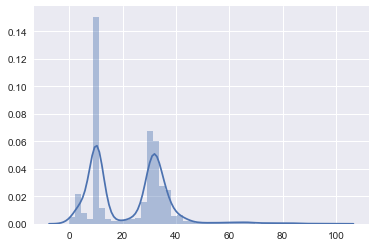

In [124]:
sns.distplot(a=y)

(0.8, 1)

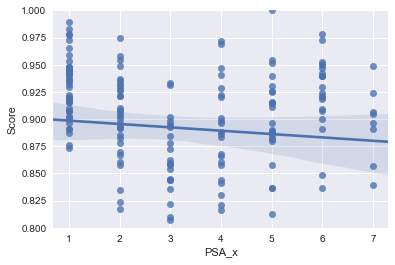

In [125]:
ax = sns.regplot(x=grouped['PSA_x'], y=grouped['Score'])
plt.ylim(0.8, 1)

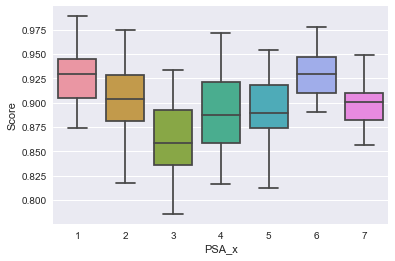

In [126]:
sns.boxplot(x=grouped['PSA_x'], y=grouped['Score'], showfliers=False)

PSA_X MIGHT be useful if we had a more flexible model.

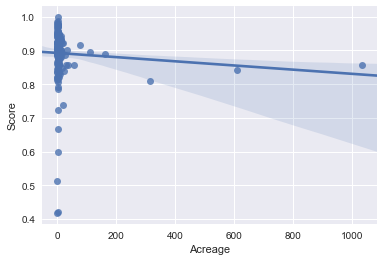

In [127]:
ax = sns.regplot(x=grouped['Acreage'], y=grouped['Score'])
# plt.ylim(0.8, 1)

Acreage is useless.

(0.7, 1)

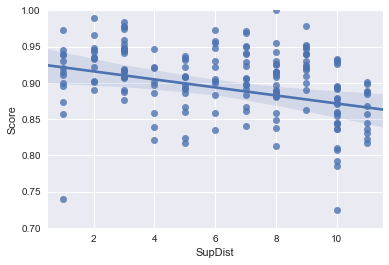

In [128]:
sns.regplot(x=grouped['SupDist'], y=grouped['Score'])
plt.ylim(0.7, 1)

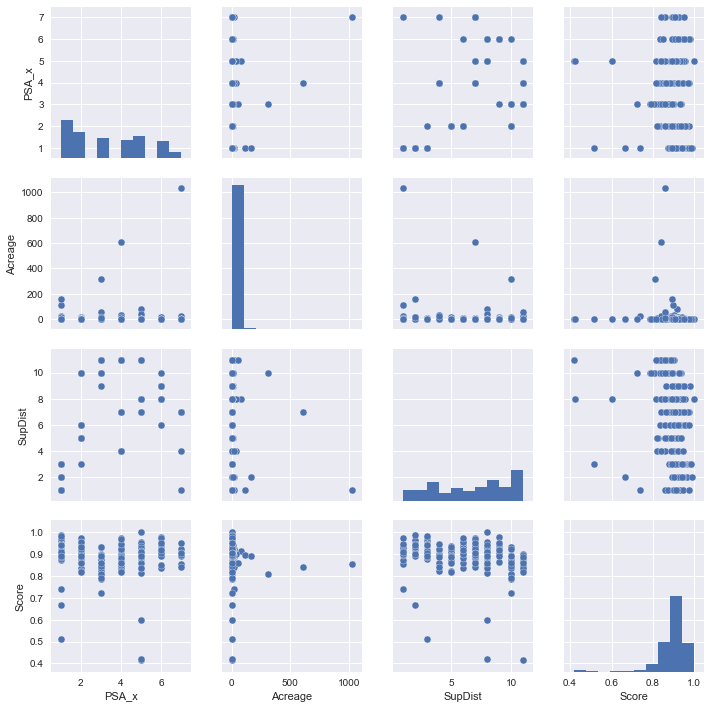

In [129]:
sns.pairplot(data=grouped[['PSA_x','Acreage','SupDist','Score']])

## Modeling
---

We found out that the only likely significant predictor is SupDist, so let's use that. 

In [130]:
predictors = ['SupDist']
target = ['Score']

X = grouped[predictors].values
y = np.ravel(grouped[target].values)

# normalize 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X=X)

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3, random_state = 1) 

lr_parks_1 = LinearRegression()
lr_parks_1.fit(X_train, y_train)
lr_parks_1.score(X_test, y_test)

-0.078414465292953928

R^2 is less than 0, and so we can conclude that this model performs worse than a horizontal line would. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


In [132]:
from sklearn.model_selection import train_test_split
X = dfa[predictor_cols].values
y = np.ravel(dfa[target_col].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [133]:
# Use ridge Regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=1.0)
rr.fit(X=X_train, y=y_train)
rr.score(X=X_test, y=y_test)

0.11580065517684657

THat didn't improve much so let's use grid search to find the best hyperparameters for our Ridge regression.

In [134]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
params = {
    'alpha':[1,10,100,1000]
}
# create grid search CV 
gs = GridSearchCV(estimator=Ridge(), param_grid=params, cv=3, verbose=1)
# fit model 
gs.fit(X_train, y_train)
# gs.cv_results_
print gs.best_score_, gs.best_params_
# score 
# gs.score(X_test, y_test)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.115961358428 {'alpha': 1}


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.7s finished


Well that didn't make a difference. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

----

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


**ANSWER**

1. The user is being biased torwards cheating the system by just inviting themselves under alias emails. The incentive is not rewarding them for using the app themselves, only rewarding them for inviting other people to use the app. 
<br>
2. Well the program is rewarding a user not by how much they spend or use the app, but by the number of friends they invite, so it seems that the company is mainly interested in getting more people to use the app, not necessarily making devoted users from a select group of people. In short, they are more interested in quality than quantity. With that in mind, I would measure the success of this program by how many new users were signing up each day/week. 
<br>
3. Many people have expressed opinions on current gun laws, do you believe that they should be more, or less strict than they are, or are you happy with how strict they currently are?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [155]:
mort = pd.read_csv('/Users/Naekid/Desktop/DSI-SF-5-fork/DSI-SF-5/datasets/mortality.txt', sep=' ')

In [156]:
mort.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,nonsmo,b,alive
1,53,167,56,250,sigare,o,dead
2,44,170,80,304,sigare,a,dead
3,37,173,89,178,nonsmo,o,alive
4,26,170,71,206,sigare,o,alive


In [157]:
mort.BLOOD.value_counts()

o     91
a     82
b     22
ab     5
Name: BLOOD, dtype: int64

In [158]:
mort.SMOKE.value_counts()

sigare    109
nonsmo     49
pipe       42
Name: SMOKE, dtype: int64

In [159]:
mort['MORT'] = mort['MORT'].map(lambda x: 1 if x=='alive' else 0)

In [160]:
def convert_blood(x):
    if x == 'o':
        return 0
    elif x == 'a':
        return 1
    elif x== 'b':
        return 2
    else:
        return 3

In [161]:
mort['BLOOD'] = mort['BLOOD'].map(convert_blood)

In [162]:
mort.describe()

,AGE,HEIGHT,WEIGHT,CHOL,BLOOD,MORT
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,35.715000,172.35000,75.885000,233.600000,0.705000,0.880000
std,9.604426,6.77399,10.442076,44.766732,0.762154,0.325777
min,18.000000,156.00000,53.000000,107.000000,0.000000,0.000000
25%,28.750000,168.00000,68.750000,204.000000,0.000000,1.000000
50%,37.000000,172.00000,75.000000,232.000000,1.000000,1.000000
75%,42.000000,176.00000,82.000000,259.000000,1.000000,1.000000
max,58.000000,191.00000,110.000000,455.000000,3.000000,1.000000


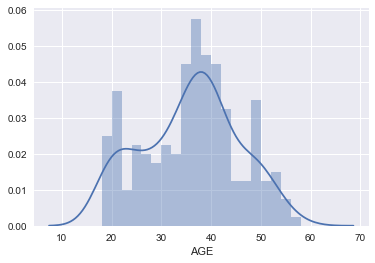

In [163]:
sns.distplot(a=mort['AGE'], bins=20)

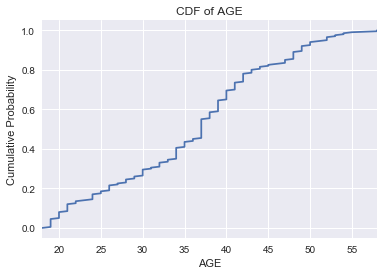

In [164]:
ser = mort['AGE']

ser = ser.sort_values()

ser[len(ser)] = ser.iloc[-1]

cum_dist = np.linspace(0.,1.,len(ser))

ser_cdf = pd.Series(cum_dist, index=ser)

ser_cdf.plot()

plt.title('CDF of AGE')
plt.ylabel('Cumulative Probability')

In [165]:
# 95% confidence interval for AGE


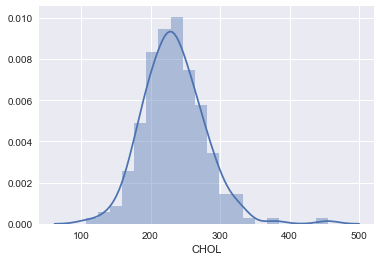

In [166]:
sns.distplot(a=mort['CHOL'], bins=20)

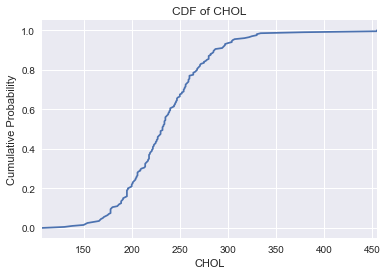

In [167]:
ser = mort['CHOL']

ser = ser.sort_values()

ser[len(ser)] = ser.iloc[-1]

cum_dist = np.linspace(0.,1.,len(ser))

ser_cdf = pd.Series(cum_dist, index=ser)

ser_cdf.plot()

plt.title('CDF of CHOL')
plt.ylabel('Cumulative Probability')

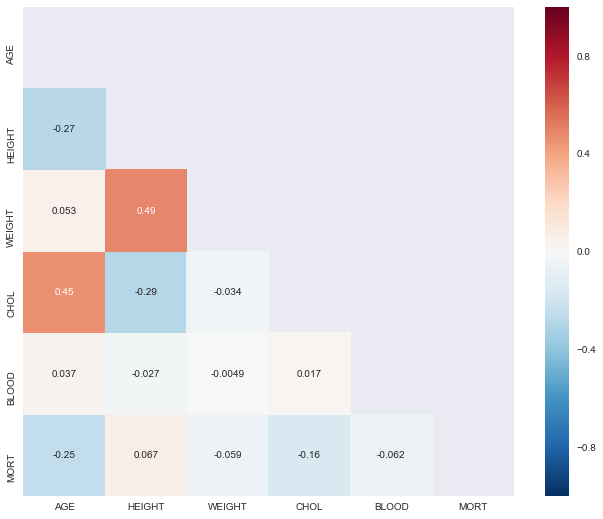

In [168]:
# Correlation matrix vis
corr = mort.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask)


CHOL and AGE are correlated, as are wight and height, which makes sense. 

In [169]:
mort.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,nonsmo,2,1
1,53,167,56,250,sigare,0,0
2,44,170,80,304,sigare,1,0
3,37,173,89,178,nonsmo,0,1
4,26,170,71,206,sigare,0,1


Using what you generated, provide short summaries of each column describing the data<BR>

AGE = not really normally distributed. 
CHOL = Normally distributed.

Is there a difference in mortality between smokers, nonsmokers? <BR>

In [170]:
mort.groupby(by='SMOKE').mean()

,AGE,HEIGHT,WEIGHT,CHOL,BLOOD,MORT
SMOKE,,,,,,
nonsmo,34.693878,171.367347,75.612245,225.734694,0.836735,0.918367
pipe,35.904762,172.785714,78.428571,242.452381,0.666667,0.904762
sigare,36.100917,172.623853,75.027523,233.724771,0.660550,0.853211


Well, the mean mortality of nonsmokers is greater than the mean mortality of nonsmokers, but we still have to do a t-test. 

In [171]:
import scipy.stats
nonsmoker_mask = mort['SMOKE']=='nonsmo'
smoker_mask = mort['SMOKE']=='sigare'
scipy.stats.ttest_ind(a=mort[smoker_mask].MORT, b=mort[nonsmoker_mask].MORT)

Ttest_indResult(statistic=-1.1367553977022882, pvalue=0.2573836973231875)

p > 0.05, so we are confident there isn't a significant difference between the two samples. 

If national average weight is 85 pounds, is our weight average significantly different?<BR>

In [172]:
mort.WEIGHT.mean()

75.885000000000005

In [173]:
scipy.stats.ttest_1samp(a=mort.WEIGHT, popmean=85)

Ttest_1sampResult(statistic=-12.344821194685455, pvalue=2.2901936138582111e-26)

P value is much lower than 0.05 so we can safely reject the null hypothesis that this sample is from the same population as the sample used to calculate the national average. 

Until now, we’ve only asked is it different. This is called a two sided test.
What if we want to know if its less than or greater than?<BR> This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative.<BR> Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
If national average weight is 85 pounds, is our weight average statistical significantly less?

I think yes, because if we device our p value in half, we get an extremeley low value, so we can still be very confident that this sample is significantly different than the national average.